In [1]:
from algorithm.utils.data.tf.dataimage import DataImage
import tensorflow as tf
import keras
%load_ext tensorboard

In [2]:
dataset = DataImage(data_path="Input/dataset", split=0.2, resize=True, height='auto', width='auto', normalize=True, mean='auto', name="Electronic components dataset", batch_size=16)

In [3]:
dataset

Electronic components dataset
	Number of points: 1223
	Root location: Input/dataset
	Split: 0.2
	Transform used:	Resize(size=(128, 128)
	Normalize(mean=[0.00392156862745098, 0.00392156862745098, 0.00392156862745098], std=None)


In [4]:
trainset = dataset.get_set(split="train")
validset = dataset.get_set(split="validation")

In [5]:
# get some random training images
dataiter = iter(trainset)
images, labels = next(dataiter)

In [6]:
images.shape, len(labels)

(TensorShape([16, 128, 128, 3]), 16)

In [7]:
images

<tf.Tensor: shape=(16, 128, 128, 3), dtype=float32, numpy=
array([[[[0.9960785 , 0.9960785 , 0.9960785 ],
         [0.9960785 , 0.9960785 , 0.9960785 ],
         [0.9960785 , 0.9960785 , 0.9960785 ],
         ...,
         [0.99488366, 0.99352026, 0.99488366],
         [0.99488366, 0.99352026, 0.99488366],
         [0.99488366, 0.99352026, 0.99488366]],

        [[0.9960785 , 0.9960785 , 0.9960785 ],
         [0.9960785 , 0.9960785 , 0.9960785 ],
         [0.9960785 , 0.9960785 , 0.9960785 ],
         ...,
         [1.        , 0.9918199 , 0.99966305],
         [1.        , 0.9918199 , 0.99966305],
         [1.        , 0.9918199 , 0.99966305]],

        [[0.9960785 , 0.9960785 , 0.9960785 ],
         [0.9960785 , 0.9960785 , 0.9960785 ],
         [0.9960785 , 0.9960785 , 0.9960785 ],
         ...,
         [1.        , 0.9958947 , 0.99794734],
         [1.        , 0.9958947 , 0.99794734],
         [1.        , 0.9958947 , 0.99794734]],

        ...,

        [[0.9758684 , 1.        ,

In [8]:
labels

<tf.Tensor: shape=(16,), dtype=string, numpy=
array([b'PINSMD', b'JUMPER', b'PINTH', b'R0805', b'C0805', b'CAPACITOR',
       b'PINTH', b'PINTH', b'CAPACITOR', b'X18Y4', b'RESISTOR', b'PINSMD',
       b'R0603', b'PINTH', b'C0805', b'R63H40'], dtype=object)>

In [9]:
class_names = dataset.labels

In [10]:
class_names

['R0603',
 'PINSMD',
 'LED',
 'SCR',
 'TRANSFORMER',
 'FUSE',
 'X43Y55',
 'ZENER',
 'X50Y65',
 'R0402',
 'VOLTAGEREGULATOR',
 'STRIP3',
 'C0603',
 'RELAIS',
 'OPENFIX',
 'R10',
 'WSK2512',
 'CTELRJ45',
 'SO8',
 'R2512',
 'RESISTOR',
 'MINIMELF',
 'SO16',
 'DIGITAL',
 'CASEC',
 'CAPACITOR',
 'TRIAC',
 'TRANSISTOR',
 'R0805',
 'C1210',
 'JUMPER',
 'PLCC2LED',
 'GATE',
 'X4Y18',
 'R63H40',
 'STRIP6',
 'SFUSE',
 'SMB',
 'R20',
 'PINTH',
 'AUTIC',
 'INDUCTANCE',
 'R110H126',
 'CONNECTOR',
 'X8Y11',
 '0805S',
 'LED3',
 'S5SOT23',
 'R1206',
 'R01005',
 'C0805',
 'X63H40',
 'MOS',
 'DIODE',
 'OPTOISOLATOR',
 'X18Y4',
 'OSCILLATOR']

In [ ]:
import matplotlib.pyplot as plt
image_batch, label_batch = next(iter(trainset))

plt.figure(figsize=(60, 60))
for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(image_batch[i].numpy().astype("uint8")) # to be implemented: normalization and resize
    label = label_batch[i].numpy().decode("utf-8")
    plt.title(label, fontsize=60)
    plt.axis("off")

In [12]:
from algorithm.deep.tf.neural_networks import ResNet2_0

In [13]:
trainset = dataset.apply_one_hot_encoding(trainset)
validset = dataset.apply_one_hot_encoding(validset)

In [14]:
out_dir = "out\models\ResNet2_0"

In [15]:
model = ResNet2_0(len(class_names),input_shape=(128, 128, 3))
tb_callback = keras.callbacks.TensorBoard(log_dir=f'{out_dir}/tensorboard_log', histogram_freq=1)

In [16]:
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=1e-3),
    loss=keras.losses.CategoricalCrossentropy(from_logits=True),
    metrics=["accuracy"],
    run_eagerly=True,
)

In [19]:
model.summary()

Model: "res_net1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             multiple                  896       
                                                                 
 conv2d_1 (Conv2D)           multiple                  18496     
                                                                 
 max_pooling2d (MaxPooling2  multiple                  0         
 D)                                                              
                                                                 
 res_net_block (ResNetBlock  multiple                  73856     
 )                                                               
                                                                 
 res_net_block_1 (ResNetBlo  multiple                  73856     
 ck)                                                             
                                                          

In [17]:
model.fit(trainset, validation_data=validset, epochs=1000, callbacks=[tb_callback])

Epoch 1/1000
62/62 [==============================] - 39s 627ms/step - loss: 4.0629 - accuracy: 0.0153 - val_loss: 4.0602 - val_accuracy: 0.0123
Epoch 2/1000
62/62 [==============================] - 40s 645ms/step - loss: 4.0646 - accuracy: 0.0133 - val_loss: 4.0602 - val_accuracy: 0.0123
Epoch 3/1000
62/62 [==============================] - 42s 684ms/step - loss: 4.0625 - accuracy: 0.0061 - val_loss: 4.0602 - val_accuracy: 0.0123
Epoch 4/1000
62/62 [==============================] - 43s 689ms/step - loss: 4.0613 - accuracy: 0.0153 - val_loss: 4.0602 - val_accuracy: 0.0123
Epoch 5/1000
62/62 [==============================] - 41s 661ms/step - loss: 4.0650 - accuracy: 0.0123 - val_loss: 4.0602 - val_accuracy: 0.0123
Epoch 6/1000
62/62 [==============================] - 41s 660ms/step - loss: 4.0679 - accuracy: 0.0092 - val_loss: 4.0602 - val_accuracy: 0.0123
Epoch 7/1000
62/62 [==============================] - 40s 648ms/step - loss: 4.0657 - accuracy: 0.0102 - val_loss: 4.0602 - val_ac

In [18]:
model.save(out_dir)

INFO:tensorflow:Assets written to: out\models\ResNet1_2\assets


INFO:tensorflow:Assets written to: out\models\ResNet1_2\assets


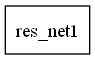

In [20]:
keras.utils.plot_model(model, f'{out_dir}/ResNet2_0.svg', show_shapes=True, show_layer_activations=True, show_layer_names=True)

In [21]:
# Evaluation on unseen data.

test_loss, test_acc = model.evaluate(validset, verbose=2)
print('\nTest accuracy:', test_acc)

16/16 - 3s - loss: 4.0590 - accuracy: 0.0123 - 3s/epoch - 163ms/step

Test accuracy: 0.012295082211494446
